# Домашнее задание № 3

## Данные 2011 года

Выполнил: Глеб Хайкин, БЭК1812

## Импорт библиотек

In [2]:
# Чтение файлов
library("readxl")
library("haven")

# Основное
## коллекция пакетов: ggplot2, dplyr, etc.
library("tidyverse")
## создание отчётов
library("knitr") 

# Картинки 
## Фиксация размеров
library("repr")
options(repr.plot.width=10, repr.plot.height=8)

## Часть 2

Загрузим данные.

In [ ]:
library(foreign)
dataset = read.spss("/Users/khaykingleb/Desktop/Personal/Work/HSE/Current Semester/Econometrics/Хайкин_2011/r20i_os_32.sav", 
                    to.data.frame=TRUE)

Опеределим переменные.

Зависимая переменная:
* `pj60` — "Сколько всего денег в течение последних 30 дней Вы лично получили, считая все: зарплату, пенсии, премии, прибыли, пособия, материальную помощь, случайные заработки и другие денежные поступления?"

Объясняющие переменные:
* `ph5` — "Пол респондента"
* `p_age` — "Количество полных лет"
* `pj6.0` — "Сколько у Вас подчиненных? Пожалуйста, посчитайте всех Ваших подчиненных, а не только тех, кто находится в Вашем непосредственном подчинении"
* `pj6.2` — "Сколько часов в среднем продолжается Ваша обычная рабочая неделя?"

Оставляем только нужные столбцы.

In [4]:
df <- subset(dataset, select = c(ph5, p_age, pj6, pj6.0, pj6.2, pj60))

Обработаем наш датафрейм.

In [5]:
df$p_age <- as.numeric(levels(df$p_age)[df$p_age])
df$pj6.0 <- as.numeric(levels(df$pj6.0)[df$pj6.0])
df$pj6.2 <- as.numeric(levels(df$pj6.2)[df$pj6.2])
df$pj60 <- as.numeric(levels(df$pj60)[df$pj60])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Заменим пропущенные значения на нули, если респондент ответил "Нет", иначе — удалим строчки с пропусками данных.

In [6]:
df$pj6.0[df$pj6 == "Нет"] <- 0

In [7]:
head(df)

,ph5,p_age,pj6,pj6.0,pj6.2,pj60
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,ЖЕНСКИЙ,38,Да,11,45,36500.00
2,ЖЕНСКИЙ,27,Нет,0,36,36000.00
3,ЖЕНСКИЙ,67,NA,NA,NA,13272.34
4,ЖЕНСКИЙ,65,NA,NA,NA,9000.00
5,ЖЕНСКИЙ,79,NA,NA,NA,11800.00
6,ЖЕНСКИЙ,57,Нет,0,40,19000.00


In [8]:
df <- na.omit(df) 

In [9]:
head(df)

,ph5,p_age,pj6,pj6.0,pj6.2,pj60
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,ЖЕНСКИЙ,38,Да,11,45,36500
2,ЖЕНСКИЙ,27,Нет,0,36,36000
6,ЖЕНСКИЙ,57,Нет,0,40,19000
7,МУЖСКОЙ,54,Нет,0,50,26000
8,ЖЕНСКИЙ,28,Нет,0,40,13000
9,ЖЕНСКИЙ,43,Нет,0,44,8000


Бинаризуем переменную `ph5`.

In [10]:
df$ph5 <- ifelse(df$ph5 == 'ЖЕНСКИЙ', 1, 0)

Поменяем названия переменных.

In [11]:
names(df)[1] <- "Gender"
names(df)[2] <- "Age"
names(df)[4] <- "Work"
names(df)[5] <- "Subordinates"
names(df)[6] <- "Income"

In [12]:
head(df)

,Gender,Age,pj6,Work,Subordinates,Income
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,1,38,Да,11,45,36500
2,1,27,Нет,0,36,36000
6,1,57,Нет,0,40,19000
7,0,54,Нет,0,50,26000
8,1,28,Нет,0,40,13000
9,1,43,Нет,0,44,8000


1) Оценим следующую линейную модель:

$$
\text{Income}_i = \beta_0 + \beta_1 \text{Age}_i + \beta_2\text{Age}^2_i + \beta_3 \text{Work_Hours}_i + \beta_4 {\text{Number_of_subordinates}}_i + \beta_5 \text{Gender}_i
$$

In [13]:
lr <- lm(Income ~ Age + I(Age^2) + Work + Subordinates + Gender, data = df)
summary(lr)


Call:
lm(formula = Income ~ Age + I(Age^2) + Work + Subordinates + 
    Gender, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-73136  -8379  -3170   4186 331033 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10478.038   1878.328   5.578 2.52e-08 ***
Age            227.643     89.469   2.544    0.011 *  
I(Age^2)        -1.564      1.051  -1.489    0.137    
Work            62.313      6.659   9.357  < 2e-16 ***
Subordinates    83.031     14.188   5.852 5.07e-09 ***
Gender       -4576.720    368.821 -12.409  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15000 on 7047 degrees of freedom
Multiple R-squared:  0.04987,	Adjusted R-squared:  0.0492 
F-statistic: 73.98 on 5 and 7047 DF,  p-value: < 2.2e-16


Получили следующую модель:

$$
\widehat{\text{Income}}_i = 10478 + 227.64 \times\text{Age}_i + 62.31 \times\text{Work_Hours}_i + 83.03\times {\text{Number_of_subordinates}}_i - 4576.72 \times\text{Gender}_i
$$

Как видим, регрессоры $\beta_3$, $\beta_4$ и $\beta_5$ статистически значимы при любом разумном уровне значимости. Также регрессор $\beta_1$ статистически значим при уровне значимости $\alpha=0.05$, однако при $\alpha=0.01$ данная гипотеза отвергается.

Модель статически адекватна при любом разумном уровне значимости. 

Ceteris paribus, в 2011 году можно было выделить следующее:

* При увеличении возраста индивида на 1 год его доход увеличивается на $227.64$ рубля.
* При увеличении одного часа работы доход индивида растет на $62.31$ рублей.
* При увеличении на одного работника в подчинении доход руководителя растет на $83.03$ рубля.
* Доход женщин меньше на $4576.72$ рублей.

2) Проверим интересные с экономической точки зрения гипотезы с помощью теста Вальда и с помощью теста отношения правдоподобия.

(а) Протестируем гипотезу о том, что пол индивида никак не влияет на его доход:

\begin{cases}
H_0: \beta_5 = 0 \\
H_a: \beta_5 \neq 0
\end{cases}


In [14]:
lr_nested <- lm(Income ~ I(Age^2) + Work + Subordinates, data = df)
lr_complex <- lm(Income ~ I(Age^2) + Gender + Work + Subordinates, data = df)

Тест отношения правдоподобия:

In [18]:
library("lmtest")

In [19]:
lrtest(lr_nested, lr_complex)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-77903.69,NA,NA,NA
2,6,-77828.83,1,149.7091,2.00698e-34


Тест Вальда:

In [20]:
waldtest(lr_nested, lr_complex, test = "Chisq")

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,7049,NA,NA,NA
2,7048,1,151.202,9.467433e-35


Гипотеза о том, что пол индивида никак не влияет на его доход, отвергается при любом разумном уровне значимости.

(b) Протестируем гипотезу о том, что пол и возраст никак не влияют на доход индивида:

\begin{cases}
H_0: \beta_i = 0, i \in \{1, 2, 5\} \\
H_a: \beta_i \neq 0
\end{cases}

In [21]:
lr_nested <- lm(Income ~ Age + I(Age^2) + Gender + Work + Subordinates, data = df)
lr_complex <- lm(Income ~ Work + Subordinates, data = df)

In [22]:
lrtest(lr_nested, lr_complex)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,-77825.59,NA,NA,NA
2,4,-77922.70,-3,194.2213,7.476391e-42


In [23]:
waldtest(lr_nested, lr_complex, test = "Chisq")

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,7047,NA,NA,NA
2,7050,-3,196.7527,2.122244e-42


Гипотеза отвергается при любом разумном уровне значимости.

(c) Протестируем гипотезу о том, что максимальный доход достигается в 55 лет:

In [24]:
df$x <- -110*df$Age + df$Age^2 

In [25]:
lr_nested <- lm(Income ~ x + Gender + Work + Subordinates, data = df)
lr_complex <- lm(Income ~ Age + I(Age^2) + Gender + Work + Subordinates, data = df)

LR-тест:

In [26]:
lrtest(lr_nested, lr_complex)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,-77827.23,NA,NA,NA
2,7,-77825.59,1,3.278705,0.07018431


Тест Вальда:

In [27]:
anova(lr_nested, lr_complex, test="Chisq")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7048,1.586558e+12,NA,NA,NA
2,7047,1.585820e+12,1,737366305,0.07027108


Гипотеза не отвергается при уровне значимости $\alpha=0.1$.

## Часть 3

1) Оценим модели бинарного выбора.

Введем бинарную переменную `pj721633` — "Имеете ли Вы или Ваша семья возможность откладывать деньги на крупные покупки — машину, дачу?"

In [28]:
df <- subset(dataset, select = c(pj721633, ph5, p_age, pj6, pj6.0, pj6.2, pj60))

In [29]:
df$p_age <- as.numeric(levels(df$p_age)[df$p_age])
df$pj6.0 <- as.numeric(levels(df$pj6.0)[df$pj6.0])
df$pj6.2 <- as.numeric(levels(df$pj6.2)[df$pj6.2])
df$pj60 <- as.numeric(levels(df$pj60)[df$pj60])

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [30]:
df$pj6.0[df$pj6 == "Нет"] <- 0

In [31]:
df$pj721633[df$pj721633=="ЗАТРУДНЯЮСЬ ОТВЕТИТЬ"] <- NA
df$pj721633[df$pj721633=="ОТКАЗ ОТ ОТВЕТА"] <- NA
df$pj721633[df$pj721633=="НЕТ ОТВЕТА"] <- NA

In [32]:
df <- na.omit(df) 

In [33]:
df <- droplevels(df)
df$ph5 <- ifelse(df$ph5 == 'ЖЕНСКИЙ', 1, 0)
df$pj721633 <- ifelse(df$pj721633 == 'Да', 1, 0)

Поменяем названия переменных.

In [34]:
names(df)[1] <- "Durables"
names(df)[2] <- "Gender"
names(df)[3] <- "Age"
names(df)[5] <- "Work"
names(df)[6] <- "Subordinates"
names(df)[7] <- "Income"

In [35]:
head(df)

,Durables,Gender,Age,pj6,Work,Subordinates,Income
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,0,1,38,Да,11,45,36500
2,0,1,27,Нет,0,36,36000
6,0,1,57,Нет,0,40,19000
7,0,0,54,Нет,0,50,26000
8,0,1,28,Нет,0,40,13000
9,0,1,43,Нет,0,44,8000


(а) Probit-модель 

$$
\mathbb{P}(Y_i=1) = F(\beta_0 + \beta_1 \text{Age}_i + \beta_2 \text{Work_Hours}_i + \beta_3 \text{Income}_i ), где
$$

$$
F(z) = \dfrac{1}{\sqrt{2\pi}}\int_{-\infty}^z \exp\left(-\dfrac{t^2}{2}\right)dt
$$

In [36]:
prob_probit <- glm(Durables ~ 1 + Age + Work + Income, family=binomial(link="probit"), data = df)
summary(prob_probit)


Call:
glm(formula = Durables ~ 1 + Age + Work + Income, family = binomial(link = "probit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.1010  -0.6835  -0.5850  -0.4748   2.1937  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.958e-01  6.087e-02 -13.074  < 2e-16 ***
Age         -1.098e-02  1.404e-03  -7.824 5.11e-15 ***
Work         5.380e-03  1.173e-03   4.588 4.48e-06 ***
Income       2.190e-05  1.245e-06  17.590  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7203.8  on 6902  degrees of freedom
Residual deviance: 6681.9  on 6899  degrees of freedom
AIC: 6689.9

Number of Fisher Scoring iterations: 6


Получили:

$$
\widehat{\mathbb{P}(Y_i=1)} = F(-0.7958 -0.01098 \times \text{Age}_i + 0.0054 \times \text{Work_Hours}_i-0.00002 \times \text{Income}_i)
$$

Все регрессоры статистически значимы при любом разумном уровне значимости.

Проверим качество probit-модели по $R^2$ МакФаддена:

In [56]:
loglik <- 0.5 * (-prob_probit$aic + 2 * length(prob_probit$coefficients))
prob_0 <- glm(Durables ~ 1, family=binomial(link="probit"), data = df)
loglik_0 <- 0.5 * (-prob_0$aic + 2 * length(prob_0$coefficients))
R_sq_mf <- 1 - (loglik / loglik_0)
R_sq_mf

[1] 0.07245372

Оценим средние предельные эффекты.

In [38]:
library("mfx")
probitmfx(prob_probit, data=df)

Call:
probitmfx(formula = prob_probit, data = df)

Marginal Effects:
             dF/dx   Std. Err.       z     P>|z|    
Age    -3.1182e-03  3.9757e-04 -7.8432 4.392e-15 ***
Work    1.5275e-03  3.3419e-04  4.5706 4.864e-06 ***
Income  6.2188e-06  3.5663e-07 17.4375 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

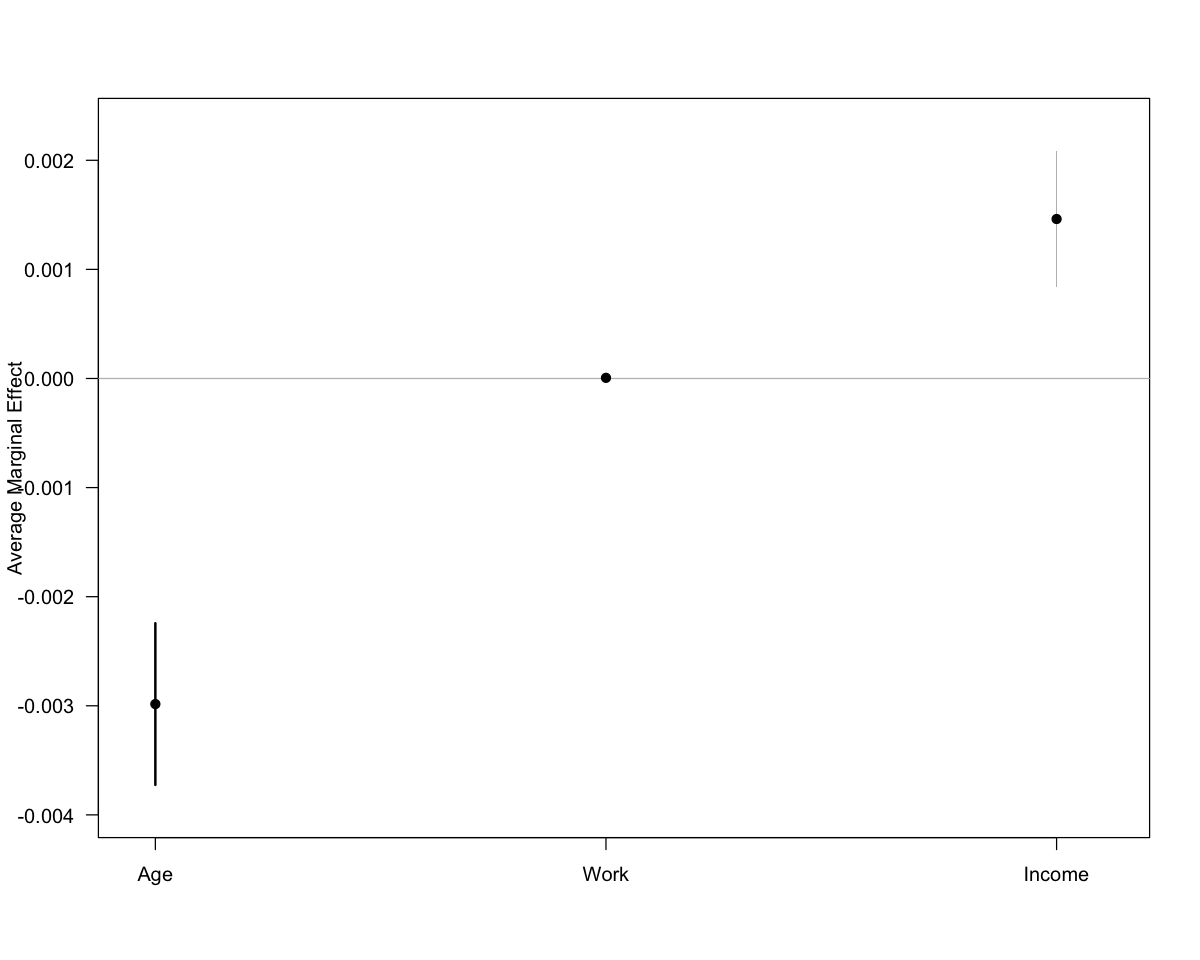

In [40]:
library("margins")
plot(margins(prob_probit))

__Экономическая интерпретация__: 

Ceteris paribus, при увеличении
* возраста индивида на один год для индивида с средним возрастом вероятность откладывать деньги на крупные покупки уменьшается на $0.31\%$. 
* рабочей недели на один час для индивида с средней продолжительностью рабочей недели вероятность откладывать деньги на крупные покупки увеличивается на $0.15\%$.
* общего дохода индивида на $1000$ рублей с средним уровнем дохода вероятность откладывать деньги на крупные покупки увеличивается на $0.62\%$.

Посмотрим на предельные эффекты для отдельных индивидов:

In [41]:
head(dydx(df, prob_probit, "Age"))

,dydx_Age
,<dbl>
1,-0.004114902
2,-0.004184111
3,-0.002642668
4,-0.003132294
5,-0.003134368
6,-0.002411663


In [42]:
head(dydx(df, prob_probit, "Work"))

,dydx_Work
,<dbl>
1,0.002015685
2,0.002049587
3,0.001294512
4,0.001534355
5,0.001535371
6,0.001181354


(b) Logit-модель

$$
\mathbb{P}(Y_i=1) = F(\beta_0 + \beta_1 \text{Age}_i + \beta_2 \text{Work_Hours}_i + \beta_3 \text{Income}_i ), где
$$

$$
F(z) = \dfrac{1}{1 - \exp({-z})}
$$

In [43]:
prob_logit <- glm(Durables ~ 1 + Age + Work + Income, family=binomial(link="logit"), data = df)
summary(prob_logit)


Call:
glm(formula = Durables ~ 1 + Age + Work + Income, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1435  -0.6774  -0.5743  -0.4684   2.2112  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.373e+00  1.069e-01 -12.838  < 2e-16 ***
Age         -1.978e-02  2.494e-03  -7.930 2.18e-15 ***
Work         9.202e-03  2.079e-03   4.426 9.61e-06 ***
Income       4.263e-05  2.211e-06  19.285  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7203.8  on 6902  degrees of freedom
Residual deviance: 6650.1  on 6899  degrees of freedom
AIC: 6658.1

Number of Fisher Scoring iterations: 5


Получили: 
$$
\widehat{\mathbb{P}(Y_i=1)} = F(-1.373 -0.0198 \times \text{Age}_i + 0.0092 \times \text{Work_Hours}_i + 0.00004 \times \text{Income}_i )
$$

Все регрессоры статистически значимы при любом разумном уровне значимости.

Проверим качество logit-модели по $R^2$ МакФаддена:

In [57]:
loglik <- 0.5 * (-prob_logit$aic + 2 * length(prob_logit$coefficients))
prob_0 <- glm(Durables ~ 1, family=binomial(link="logit"), data = df)
loglik_0 <- 0.5 * (-prob_0$aic + 2 * length(prob_0$coefficients))
R_sq_mf <- 1 - (loglik / loglik_0)
R_sq_mf

[1] 0.07686543

Как видим, качество logit-модели немного лучше probit-модели.

Предельные эффекты.



In [44]:
margins_logit <- logitmfx(prob_logit, data=df)
margins_logit

Call:
logitmfx(formula = prob_logit, data = df)

Marginal Effects:
             dF/dx   Std. Err.       z     P>|z|    
Age    -3.1977e-03  4.0006e-04 -7.9930 1.317e-15 ***
Work    1.4880e-03  3.3780e-04  4.4049 1.058e-05 ***
Income  6.8938e-06  3.5873e-07 19.2172 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

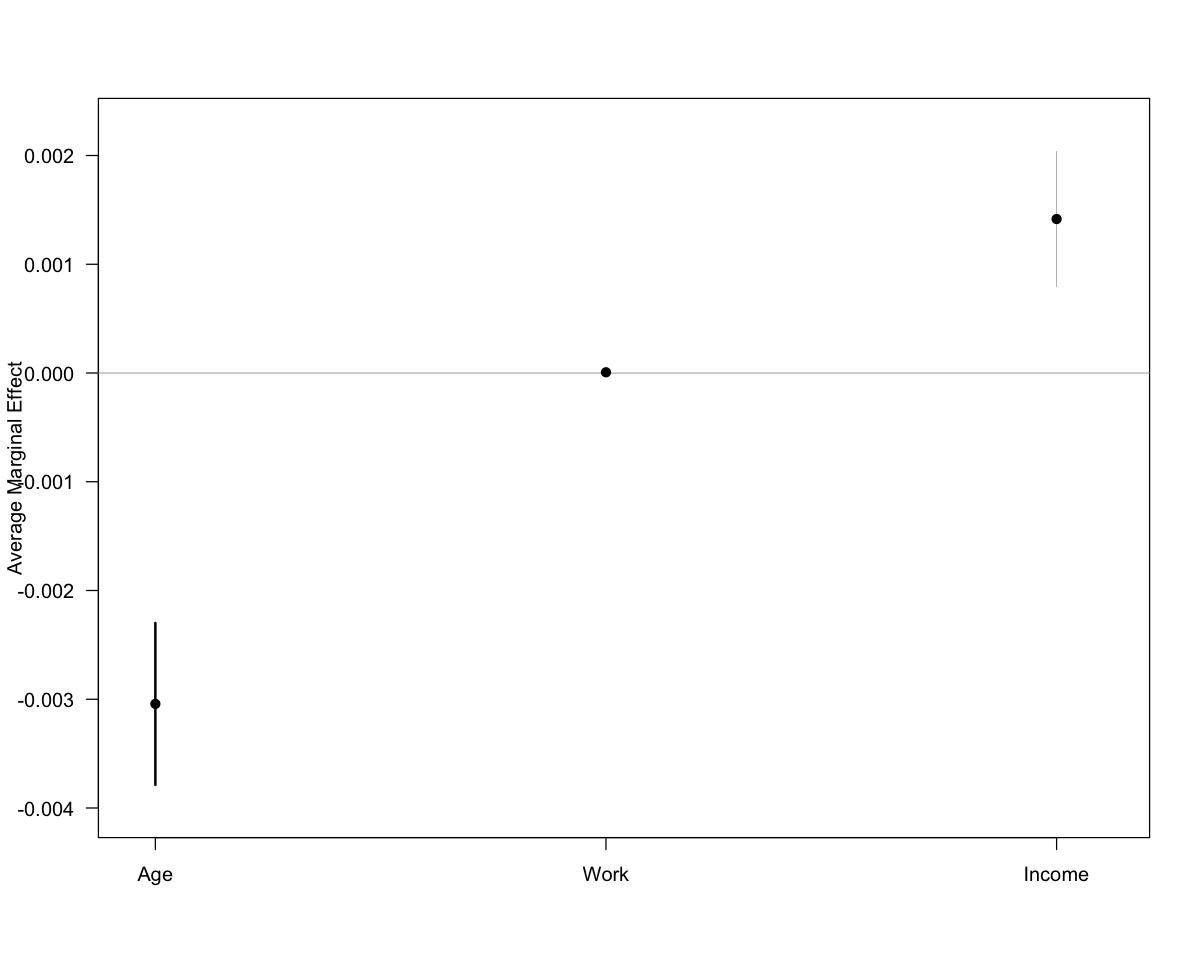

In [45]:
plot(margins(prob_logit))

__Экономическая интерпретация__: 

Ceteris paribus, при увеличении 
* возраста индивида на один год для индивида с средним возрастом вероятность откладывать деньги на крупные покупки уменьшается на $0.32 \%$. 
* рабочей недели на один час для индивида с средней продолжительностью рабочей недели ероятность откладывать деньги на крупные покупки увеличивается на $0.15 \%$.
* общего дохода индивида на $1000$ рублей с средним уровнем дохода вероятность откладывать деньги на крупные покупки увеличивается на $0.69 \%$ .

Посмотрим на предельные эффекты для отдельных индивидов:

In [46]:
head(dydx(df, prob_logit, "Age"))

,dydx_Age
,<dbl>
1,-0.004683650
2,-0.004776542
3,-0.002600341
4,-0.003266482
5,-0.003190278
6,-0.002267624


In [47]:
head(dydx(df, prob_logit, "Work"))

,dydx_Work
,<dbl>
1,0.002179484
2,0.002222711
3,0.001210041
4,0.001520023
5,0.001484562
6,0.001055215


2)

(a) Probit-модель

Создадим функцию, которая по порогу считает количество TP, TN, FP, FN.

In [48]:
tfnp <- function(cut = 0.5, y_true, prob_probit) {
  y_pred <- prob_probit > cut
  TP <- sum((y_true == 1) & (y_pred == 1))
  TN <- sum((y_true == 0) & (y_pred == 0))
  FP <- sum((y_true == 0) & (y_pred == 1))
  FN <- sum((y_true == 1) & (y_pred == 0))
  return(c(TP, TN, FP, FN))
}

Для разных порогов считаем специфичность и чувствительность.

In [49]:
cuts = seq(0,1, len = 21)
cuts

[1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

In [50]:
t <- data.frame(cuts, TP = 0, TN = 0, FP = 0, FN = 0)

for (i in 1:nrow(t)) {
  t[i, 2:5] <- tfnp(t$cuts[i], df$Durables, prob_probit$fitted.values)
}

t$Specificity <- t$TN / (t$TN + t$FP)
t$Sensitivity <- t$TP / (t$TP + t$FN)
t$Accuracy <- (t$TP + t$TN) / (t$TP + t$TN + t$FN + t$FP)

In [51]:
t

cuts,TP,TN,FP,FN,Specificity,Sensitivity,Accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,1491,0,5412,0,0.00000000,1.00000000,0.2159930
0.05,1491,0,5412,0,0.00000000,1.00000000,0.2159930
0.10,1486,112,5300,5,0.02069475,0.99664655,0.2314936
0.15,1303,1726,3686,188,0.31892092,0.87391013,0.4387947
0.20,957,3432,1980,534,0.63414634,0.64185111,0.6358105
0.25,650,4526,886,841,0.83628973,0.43594903,0.7498189
0.30,450,4940,472,1041,0.91278640,0.30181087,0.7808199
0.35,308,5153,259,1183,0.95214339,0.20657277,0.7911053
0.40,219,5251,161,1272,0.97025129,0.14688129,0.7924091


Нарисуем ROC-кривую.

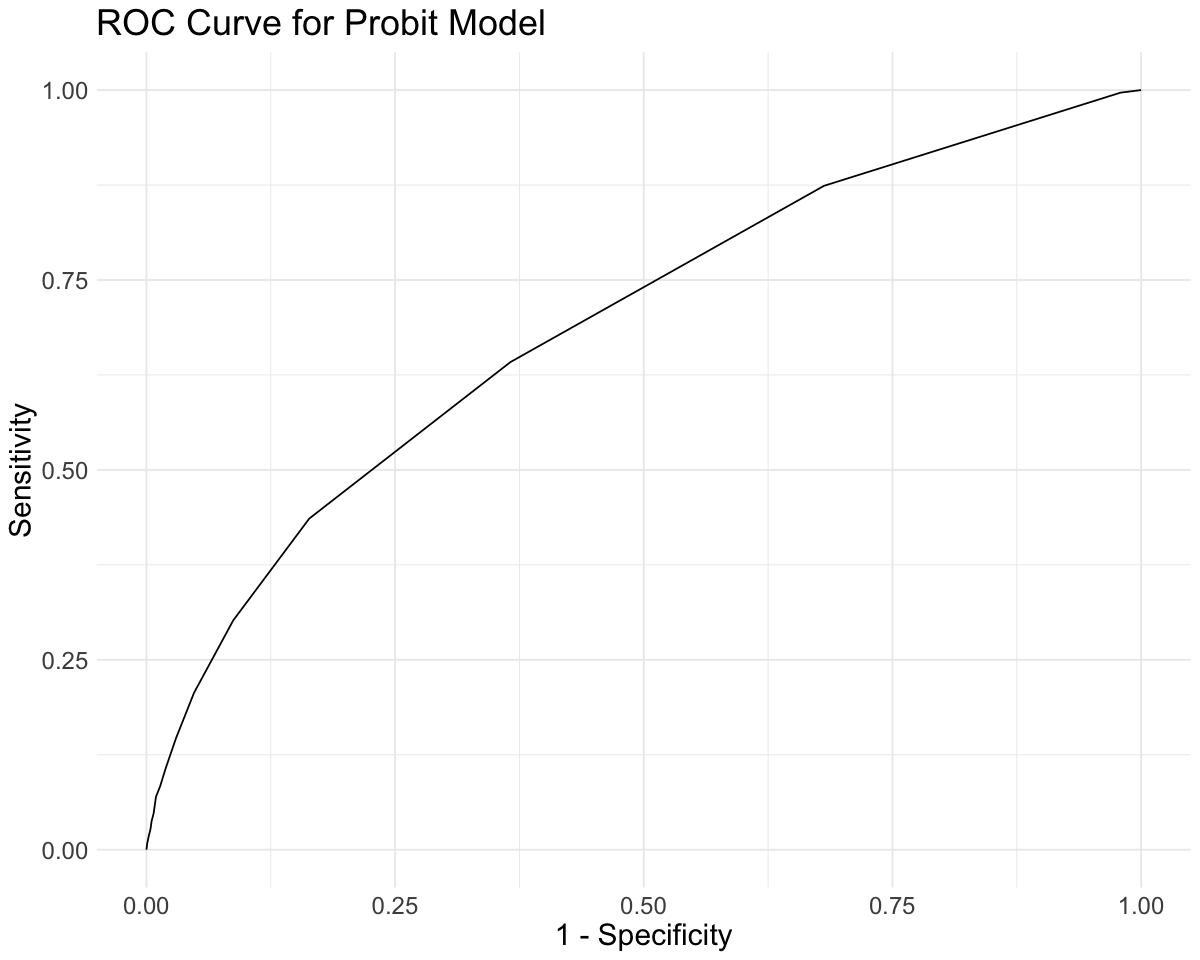

In [52]:
ggplot(data = t, aes(x = 1 - Specificity, y = Sensitivity)) +
    geom_line() + 
    theme_minimal() +
    theme(text = element_text(size=18)) +
    ggtitle("ROC Curve for Probit Model")

(б) Logit-модель

In [53]:
tfnp <- function(cut = 0.5, y_true, prob_logit) {
  y_pred <- prob_logit > cut
  TP <- sum((y_true == 1) & (y_pred == 1))
  TN <- sum((y_true == 0) & (y_pred == 0))
  FP <- sum((y_true == 0) & (y_pred == 1))
  FN <- sum((y_true == 1) & (y_pred == 0))
  return(c(TP, TN, FP, FN))
}

cuts = seq(0,1, len = 21)
t <- data.frame(cuts, TP = 0, TN = 0, FP = 0, FN = 0)

for (i in 1:nrow(t)) {
  t[i, 2:5] <- tfnp(t$cuts[i], df$Durables, prob_logit$fitted.values)
}

t$Specificity <- t$TN / (t$TN + t$FP)
t$Sensitivity <- t$TP / (t$TP + t$FN)
t$Accuracy <- (t$TP + t$TN) / (t$TP + t$TN + t$FN + t$FP)

In [54]:
t

cuts,TP,TN,FP,FN,Specificity,Sensitivity,Accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,1491,0,5412,0,0.00000000,1.00000000,0.2159930
0.05,1491,0,5412,0,0.00000000,1.00000000,0.2159930
0.10,1482,167,5245,9,0.03085735,0.99396378,0.2388816
0.15,1281,1900,3512,210,0.35107169,0.85915493,0.4608141
0.20,933,3549,1863,558,0.65576497,0.62575453,0.6492829
0.25,667,4496,916,824,0.83074649,0.44735077,0.7479357
0.30,483,4878,534,1008,0.90133038,0.32394366,0.7766189
0.35,351,5103,309,1140,0.94290466,0.23541247,0.7900913
0.40,265,5203,209,1226,0.96138211,0.17773307,0.7921194


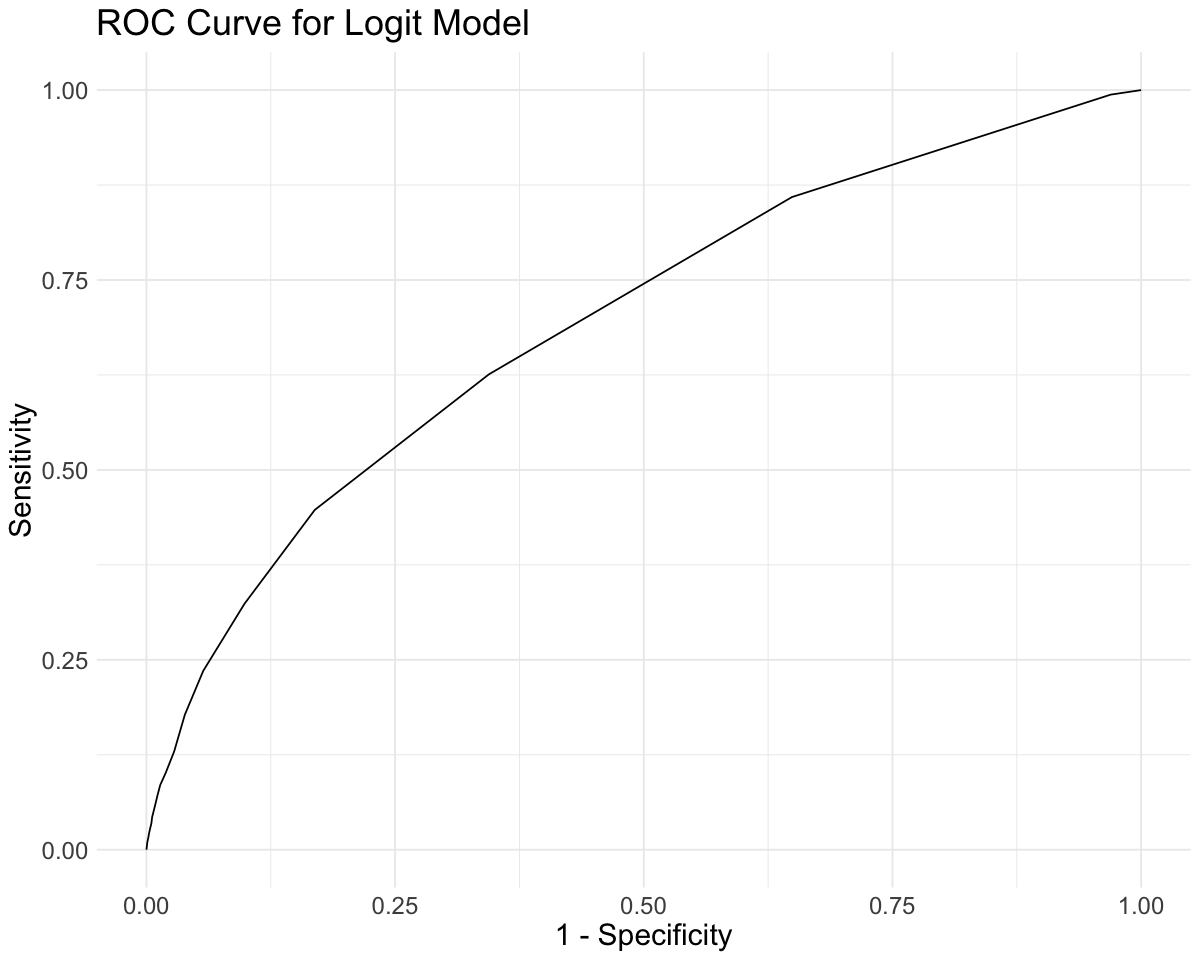

In [55]:
ggplot(data = t, aes(x = 1 - Specificity, y = Sensitivity)) +
    geom_line() + 
    theme_minimal() +
    theme(text = element_text(size=18)) +
    ggtitle("ROC Curve for Logit Model")